## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Load training data

In [2]:
train_data_file = "train.csv"
train_data = pd.read_csv(train_data_file)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Drop data which won't be used for training

In [3]:
train_data = train_data.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin"])
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Count NaN values in consecutive columns

In [4]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## Fill NaN in Age column with mean values

In [5]:
train_data["Age"].fillna(value = train_data["Age"].mean(), inplace = True)

## Drop rows with NaN in Embarked column

In [6]:
train_data.dropna(subset=['Embarked'], inplace=True)

## Quantify Sex data

In [7]:
train_data["Is_male"] = (train_data["Sex"] == "male").astype(int)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Is_male
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,0
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,0
4,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,0
889,1,1,male,26.000000,0,0,30.0000,C,1


## Quantify Embarked data

In [8]:
train_data["Embarked_S"] = (train_data["Embarked"] == "S").astype(int)
train_data["Embarked_C"] = (train_data["Embarked"] == "C").astype(int)
train_data["Embarked_Q"] = (train_data["Embarked"] == "Q").astype(int)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Is_male,Embarked_S,Embarked_C,Embarked_Q
0,0,3,male,22.000000,1,0,7.2500,S,1,1,0,0
1,1,1,female,38.000000,1,0,71.2833,C,0,0,1,0
2,1,3,female,26.000000,0,0,7.9250,S,0,1,0,0
3,1,1,female,35.000000,1,0,53.1000,S,0,1,0,0
4,0,3,male,35.000000,0,0,8.0500,S,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,1,0,0
887,1,1,female,19.000000,0,0,30.0000,S,0,1,0,0
888,0,3,female,29.699118,1,2,23.4500,S,0,1,0,0
889,1,1,male,26.000000,0,0,30.0000,C,1,0,1,0


## Normalize Pclass, Age, SibSp, Parch and Fare data

In [9]:
train_data["Pclass_norm"] = train_data["Pclass"] / train_data["Pclass"].max()
train_data["Age_norm"] = train_data["Age"] / train_data["Age"].max()
train_data["SibSp_norm"] = train_data["SibSp"] / train_data["SibSp"].max()
train_data["Parch_norm"] = train_data["Parch"] / train_data["Parch"].max()
train_data["Fare_norm"] = train_data["Fare"] / train_data["Fare"].max()
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Is_male,Embarked_S,Embarked_C,Embarked_Q,Pclass_norm,Age_norm,SibSp_norm,Parch_norm,Fare_norm
0,0,3,male,22.000000,1,0,7.2500,S,1,1,0,0,1.000000,0.275000,0.125,0.000000,0.014151
1,1,1,female,38.000000,1,0,71.2833,C,0,0,1,0,0.333333,0.475000,0.125,0.000000,0.139136
2,1,3,female,26.000000,0,0,7.9250,S,0,1,0,0,1.000000,0.325000,0.000,0.000000,0.015469
3,1,1,female,35.000000,1,0,53.1000,S,0,1,0,0,0.333333,0.437500,0.125,0.000000,0.103644
4,0,3,male,35.000000,0,0,8.0500,S,1,1,0,0,1.000000,0.437500,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,1,0,0,0.666667,0.337500,0.000,0.000000,0.025374
887,1,1,female,19.000000,0,0,30.0000,S,0,1,0,0,0.333333,0.237500,0.000,0.000000,0.058556
888,0,3,female,29.699118,1,2,23.4500,S,0,1,0,0,1.000000,0.371239,0.125,0.333333,0.045771
889,1,1,male,26.000000,0,0,30.0000,C,1,0,1,0,0.333333,0.325000,0.000,0.000000,0.058556


## Drop unnecessary columns

In [10]:
train_data = train_data.drop(columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"])
train_data

,Survived,Is_male,Embarked_S,Embarked_C,Embarked_Q,Pclass_norm,Age_norm,SibSp_norm,Parch_norm,Fare_norm
0,0,1,1,0,0,1.000000,0.275000,0.125,0.000000,0.014151
1,1,0,0,1,0,0.333333,0.475000,0.125,0.000000,0.139136
2,1,0,1,0,0,1.000000,0.325000,0.000,0.000000,0.015469
3,1,0,1,0,0,0.333333,0.437500,0.125,0.000000,0.103644
4,0,1,1,0,0,1.000000,0.437500,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,0,0,0.666667,0.337500,0.000,0.000000,0.025374
887,1,0,1,0,0,0.333333,0.237500,0.000,0.000000,0.058556
888,0,0,1,0,0,1.000000,0.371239,0.125,0.333333,0.045771
889,1,1,0,1,0,0.333333,0.325000,0.000,0.000000,0.058556


## Shuffle the data

In [11]:
train_data = train_data.sample(frac = 1)
train_data

,Survived,Is_male,Embarked_S,Embarked_C,Embarked_Q,Pclass_norm,Age_norm,SibSp_norm,Parch_norm,Fare_norm
705,0,1,1,0,0,0.666667,0.4875,0.000,0.000000,0.050749
615,1,0,1,0,0,0.666667,0.3000,0.125,0.333333,0.126872
696,0,1,1,0,0,1.000000,0.5500,0.000,0.000000,0.015713
631,0,1,1,0,0,1.000000,0.6375,0.000,0.000000,0.013769
652,0,1,1,0,0,1.000000,0.2625,0.000,0.000000,0.016461
...,...,...,...,...,...,...,...,...,...,...
369,1,0,0,1,0,0.333333,0.3000,0.000,0.000000,0.135265
802,1,1,1,0,0,0.333333,0.1375,0.125,0.333333,0.234224
456,0,1,1,0,0,0.333333,0.8125,0.000,0.000000,0.051822
221,0,1,1,0,0,0.666667,0.3375,0.000,0.000000,0.025374


## Select data to train the model

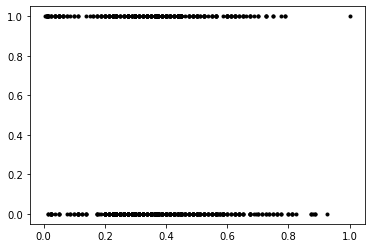

In [12]:
# Select inputs
input_values = train_data.drop(columns = ["Survived"])

# Select label values
label_values = train_data["Survived"]

# Plot data
plt.plot(input_values["Age_norm"], label_values, "k.")
plt.show()

## Split data for training, validation and testing

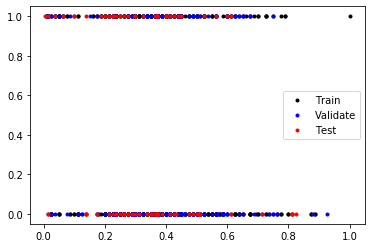

In [13]:
SAMPLES = train_data.shape[0]

# 65% for training
TRAIN_SPLIT = int(0.65 * SAMPLES)
# 25% for testing (so next division at 65% + 25% = 90%)
TEST_SPLIT = int(0.25 * SAMPLES + TRAIN_SPLIT)

# Store new data sets
input_train, input_validate, input_test = np.split(input_values, [TRAIN_SPLIT, TEST_SPLIT])
label_train, label_validate, label_test = np.split(label_values, [TRAIN_SPLIT, TEST_SPLIT])

# Plot
plt.plot(input_train["Age_norm"], label_train, "k.", label="Train")
plt.plot(input_validate["Age_norm"], label_validate, "b.", label="Validate")
plt.plot(input_test["Age_norm"], label_test, "r.", label="Test")
plt.legend()
plt.show()

## Define the ML model

In [14]:
from tensorflow.keras import layers

model = tf.keras.Sequential()

model.add(layers.Dense(14, activation = "relu", input_shape = (9,)))
model.add(layers.Dense(8, activation = "relu"))
model.add(layers.Dense(4, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Train the ML model

In [15]:
titanic2_ml = model.fit(input_train, label_train, epochs = 150, batch_size = 32, validation_data = (input_validate, label_validate))

Epoch 1/150
19/19 [==============================] - 0s 7ms/step - loss: 0.6879 - accuracy: 0.6049 - val_loss: 0.6623 - val_accuracy: 0.6396
Epoch 2/150
19/19 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6135 - val_loss: 0.6418 - val_accuracy: 0.6396
Epoch 3/150
19/19 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6135 - val_loss: 0.6298 - val_accuracy: 0.6396
Epoch 4/150
19/19 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6135 - val_loss: 0.6231 - val_accuracy: 0.6396
Epoch 5/150
19/19 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6135 - val_loss: 0.6157 - val_accuracy: 0.6396
Epoch 6/150
19/19 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6135 - val_loss: 0.6071 - val_accuracy: 0.6396
Epoch 7/150
19/19 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.6153 - val_loss: 0.6007 - val_accuracy: 0.6441
Epoch 8/150
1

## Output analysis

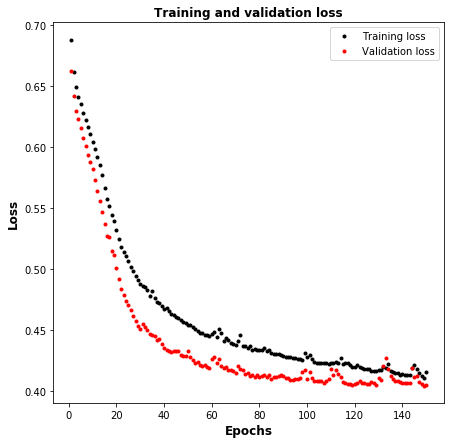

In [16]:
loss = titanic2_ml.history["loss"]
val_loss = titanic2_ml.history["val_loss"]
epochs = range(1, len(loss) + 1)

fig, ax1 = plt.subplots(1, 1, figsize=(7,7))

ax1.plot(epochs, loss, "k.", label = "Training loss")
ax1.plot(epochs, val_loss, "r.", label = "Validation loss")
ax1.set_title("Training and validation loss", size = 12, fontweight="bold")
ax1.set_xlabel("Epochs", size = 12, fontweight="bold")
ax1.set_ylabel("Loss", size = 12, fontweight="bold")
ax1.legend(loc='upper right')
plt.show()

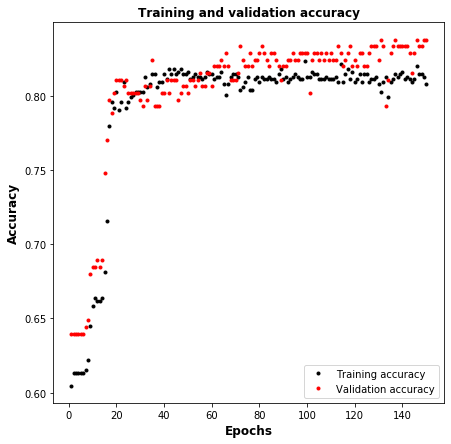

In [17]:
accuracy = titanic2_ml.history["accuracy"]
val_accuracy = titanic2_ml.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)

fig, ax1 = plt.subplots(1, 1, figsize=(7,7))

ax1.plot(epochs, accuracy, "k.", label = "Training accuracy")
ax1.plot(epochs, val_accuracy, "r.", label = "Validation accuracy")
ax1.set_title("Training and validation accuracy", size = 12, fontweight="bold")
ax1.set_xlabel("Epochs", size = 12, fontweight="bold")
ax1.set_ylabel("Accuracy", size = 12, fontweight="bold")
ax1.legend(loc='lower right')
plt.show()

## Save model to file

In [18]:
model_filename = "ML_model_titanic2"

model.save(model_filename)

INFO:tensorflow:Assets written to: ML_model_titanic2\assets
